In [74]:
import selenium
import pandas as pd
import numpy as np
import unittest
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import chrome
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [75]:
import re

def convert_text_to_number(text):
  """Converts a text string of a large number with commas to a number.

  Args:
    text: The text string to convert.

  Returns:
    The number represented by the text string.
  """

  pattern = r"^(-?\d+)(\,\d+)?"
  match = re.match(pattern, text)
  if match:
    return int(match.group(1).replace(",", ""))
  else:
    return None

In [76]:
options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)
driver = webdriver.Chrome(options=options , service=Service(ChromeDriverManager().install()))


In [77]:

cities = ["×—×™×¤×”", "×ª×œ ××‘×™×‘", "×¨××©×•×Ÿ ×œ×¦×™×•×Ÿ"]
date_arr = []
street_arr = []
rooms_arr = []
area_size_arr = []
floor_arr = []
price_arr = []
price_per_sm_arr = []
year_arr = []
city_arr = []

for city in cities:
    driver.get('https://www.ad.co.il/nadlanprice?keyword=' + city)
    
    element = driver.find_elements(By.XPATH , '//*[@id="cards"]/div/table/tbody/tr')
    for row in element:
        date = row.find_elements(By.TAG_NAME, "td")[0]
        ci = row.find_elements(By.TAG_NAME, "td")[1]
        street = row.find_elements(By.TAG_NAME, "td")[2]
        rooms = row.find_elements(By.TAG_NAME, "td")[3]
        area_size = row.find_elements(By.TAG_NAME, "td")[4]
        floor = row.find_elements(By.TAG_NAME, "td")[5]
        price = row.find_elements(By.TAG_NAME, "td")[6]
        price_per_sm = row.find_elements(By.TAG_NAME, "td")[7]
        year = row.find_elements(By.TAG_NAME, "td")[8]

        print(date.text, ci.text, street.text, rooms.text, area_size.text, floor.text, price.text, price_per_sm.text, year.text)
        date_arr.append(date.text)
        street_arr.append(street.text)
        rooms_arr.append(convert_text_to_number(rooms.text))
        area_size_arr.append(convert_text_to_number(area_size.text))
        floor_arr.append(convert_text_to_number(floor.text))
        price_arr.append(convert_text_to_number(price.text))
        price_per_sm_arr.append(price_per_sm.text)
        year_arr.append(convert_text_to_number(year.text))
        city_arr.append(city)
    
driver.quit()

24/1/2021 ×—×™×¤×” ××•×¨×Ÿ 21 4 100 4 1,050,000 10,500 
24/1/2021 ×—×™×¤×” ×‘×™×ª ××œ 22 3 65 5 1,150,000 17,692 
24/1/2021 ×—×™×¤×” ×–×•×¨×¡ 4 3 60 2 835,000 13,916 
22/1/2021 ×—×™×¤×” ×©×‘×“×™×” 13 3 55 2 1,820,000 33,090 
22/1/2021 ×—×™×¤×” × ×•×£ ×©×× ×Ÿ 3 3 55  1,820,000 33,090 
21/1/2021 ×—×™×¤×” ×‘×™×ª ×œ×—× 35 3 59 2 1,000,000 16,949 
21/1/2021 ×—×™×¤×” ××•×¨×œ× ×“ 16 4 85 3 1,525,000 17,941 
21/1/2021 ×—×™×¤×” ×”×©×™×™×¨×” 26 5 124  1,720,000 13,870 
21/1/2021 ×—×™×¤×” ×”×©×™×™×¨×” 26 5 124 1 1,720,000 13,870 
20/1/2021 ×—×™×¤×” ×›× ×¨×ª 15 3 36 2 760,000 21,111 
20/1/2021 ×—×™×¤×” × ×•×¨×“××• 34 3 66 2 850,000 12,878 
19/1/2021 ×—×™×¤×” ×ž×¨×’×œ×™×ª 22 5 122  3,600,000 29,508 
19/1/2021 ×—×™×¤×” ×ž×©×” ×‘×™×™×œ×™× ×¡×•×Ÿ 13 5 108  1,425,000 13,194 
19/1/2021 ×—×™×¤×” ×ž×¨×’×œ×™×ª 24 5 122 6 3,600,000 29,508 
19/1/2021 ×—×™×¤×” ×¢×ž×œ 31 3 57  810,000 14,210 
19/1/2021 ×—×™×¤×” ×‘×™×œ×™× ×¡×•×Ÿ 13 5 108 2 1,425,000 13,194 
19/1/2021 ×—×™×¤×” ×¢×ž×œ 31 3 57 1 810,000 14,2

In [78]:


d = {'date': date_arr,
'rooms': rooms_arr,
'area_size': area_size_arr,
'floor': floor_arr,
'price': price_arr,
'year': year_arr,
'city': city_arr}

df = pd.DataFrame(data=d)

df


,date,rooms,area_size,floor,price,year,city
0,24/1/2021,4.0,100.0,4.0,1,None,×—×™×¤×”
1,24/1/2021,3.0,65.0,5.0,1,None,×—×™×¤×”
2,24/1/2021,3.0,60.0,2.0,835,None,×—×™×¤×”
3,22/1/2021,3.0,55.0,2.0,1,None,×—×™×¤×”
4,22/1/2021,3.0,55.0,NaN,1,None,×—×™×¤×”
...,...,...,...,...,...,...,...
142,06/12/2020,4.0,104.0,5.0,1,None,×¨××©×•×Ÿ ×œ×¦×™×•×Ÿ
143,04/12/2020,3.0,36.0,NaN,1,None,×¨××©×•×Ÿ ×œ×¦×™×•×Ÿ
144,02/12/2020,3.0,62.0,1.0,1,None,×¨××©×•×Ÿ ×œ×¦×™×•×Ÿ
145,02/12/2020,6.0,151.0,16.0,3,None,×¨××©×•×Ÿ ×œ×¦×™×•×Ÿ


In [79]:
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [80]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [81]:
#from sklearn.model_selection import train_test_split
# predictors = df[['rm']]
# target = df['medv']
#X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=40)

## one xy
x = df['area_size']
y = df['price']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

## molti xy
#x = df[['city', 'area_size', 'rooms']]
#y = df['price']
#x = (x - x.mean()) / x.std()
#x = np.c_[np.ones(x.shape[0]), x] 





In [82]:
class TestLinearRegression(unittest.TestCase):

    def test_find_coefficients(self):
      clf = LinearRegression()
      clf.fit(x, y, n_iter=2000, lr=0.01)
      np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))


In [83]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    for i in range(n_iter):        
        self._gradient_descent_step(x, y, lr)       
        
    return self

In [88]:
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)



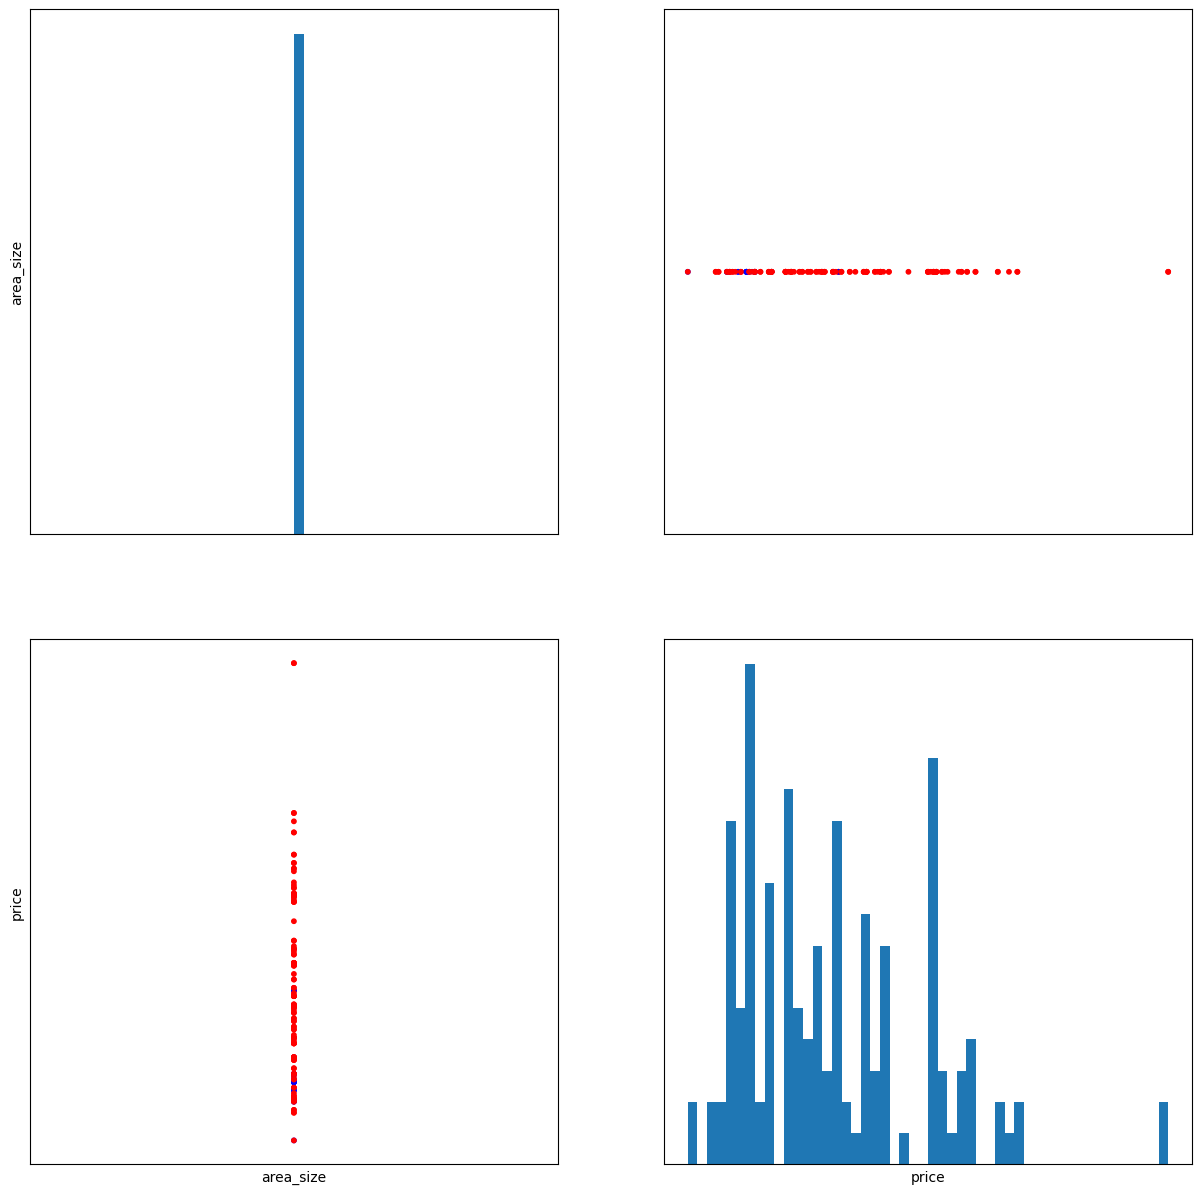

In [95]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
feature_labels = ['area_size','price']
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
feature_labels = ['area_size','price']
for i in range(2):
    axs[1, i].set_xlabel(feature_labels[i])
    axs[i, 0].set_ylabel(feature_labels[i])

for i in range(2):
    for j in range(2):
        if i == j:
            axs[i, j].hist(x[:, i], bins=50)
        else:
            axs[i, j].scatter(x[:, j], x[:, i], c=price_arr, cmap=cmap_bold, s=10)

        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])